In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive
%cd 'My Drive'
%cd 'IS projects'
%cd Homework4


/content/drive
/content/drive/My Drive
/content/drive/My Drive/IS projects
/content/drive/My Drive/IS projects/Homework4


In [3]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate
import itertools

TRAIN_SIZE = 0.8
LABEL = 10
UNIQUE_FEATURE = 10
HIGH_INCOME = 1
LOW_INCOME = 0

#### Read data and clean it (omid missing attributs)

In [4]:
def read_data(filename): 
  data = pd.read_csv(filename)
  data = data.loc[data['occupation'].str.contains(r'[?]') == False]
  cleaned_data = data.loc[data['native-country'].str.contains(r'[?]') == False]
  return cleaned_data.to_numpy()

#### Spliting data -  80%/20% 

In [5]:
def split_data(data):
  train_data_size = int(np.floor(data.shape[0]*TRAIN_SIZE))
  indexes = random.sample(range(0, data.shape[0]), train_data_size)
  indexes.sort()

  train = data[indexes]
  train_data, train_label = train[:, :], train[:, LABEL]
  listed_data = data.tolist()
  for i in range(train_data_size): listed_data.pop(indexes[i] - i)
  test = np.array(listed_data)
  test_data, test_label = test[:, :], test[:, LABEL]
  return train_data, test_data, train_label, test_label

### Extracting unique features of each attribute

In [6]:
def unique_feature_extractor(train_data):
  unique_feature = []
  for i in range(train_data.shape[1]):
      unique_attribute = np.unique(train_data[:, i])
      unique_feature.append(unique_attribute)
  return unique_feature

### Fill feature dictionary (# of low incomes and high incomes)

In [7]:
def fill_feature_dict(train_data, feature, feature_dict):
  for row_wise_data in train_data:
    if row_wise_data[-1] == unique_feature[-1][LOW_INCOME]: feature_dict[feature][row_wise_data[feature]][LOW_INCOME] += 1
    else: feature_dict[feature][row_wise_data[feature]][HIGH_INCOME] += 1
  return feature_dict

### Predect whether each data belongs to low income category or high income category

In [8]:
def predict_income(feature_dict, test_data):
    low_income_population = feature_dict[-1][unique_feature[-1][LOW_INCOME]][LOW_INCOME]
    high_income_population  = feature_dict[-1][unique_feature[-1][HIGH_INCOME]][HIGH_INCOME]
    population = low_income_population + high_income_population + UNIQUE_FEATURE
    predicted_income = []

    for row_wise_data in test_data:
        low_income_probability = feature_dict[-1][unique_feature[-1][LOW_INCOME]][LOW_INCOME] / population
        high_income_probability = feature_dict[-1][unique_feature[-1][HIGH_INCOME]][HIGH_INCOME] / population
        for feature in range(1, len(row_wise_data)):
            low_income_probability *=  (feature_dict[feature][row_wise_data[feature]][LOW_INCOME] + 1)
            high_income_probability *=  (feature_dict[feature][row_wise_data[feature]][HIGH_INCOME] + 1)

        if low_income_probability > high_income_probability :  predicted_income.append(unique_feature[-1][LOW_INCOME])
        else: predicted_income.append(unique_feature[-1][HIGH_INCOME])
    return predicted_income

#### Confusion Matrix 

In [9]:
def make_confusion_matrix(test_labels, predicted_labels):
  class_labels = np.unique(test_labels)  
  return np.array([[np.sum((test_labels == class_labels[i]) & (predicted_labels == class_labels[j])) for j in range(len(class_labels))] for i in  range(len(class_labels))]) 

In [10]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.gist_yarg):
    plt.figure(figsize = (5,5))
    plt.imshow(matrix, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 10, fontweight = 'bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='white' if matrix[i,j]>thresh else 'grey')
    plt.ylabel('True Labels', fontsize = 10, fontweight = 'bold')
    plt.xlabel('Predicted Lables', fontsize = 10, fontweight = 'bold')
    plt.show()

In [16]:
data = read_data('income_Q5.csv')
np.random.shuffle(data)
train_data, test_data, train_label, test_label = split_data(data)

In [17]:
unique_feature = unique_feature_extractor(train_data)
feature_dict = [{f:[0, 0] for f in unique_feature[u]} for u in range(len(train_data[0]))]
for feature in range(len(train_data[0])): feature_dict = fill_feature_dict(train_data, feature, feature_dict)

In [18]:
predicted_income = predict_income(feature_dict, test_data)

In [19]:
print('Accuracy of clasification using Naive Bayes with laplace smoothing is: %% %1.2f' %((test_data.T[-1] == predicted_income).mean()*100))

Accuracy of clasification using Naive Bayes with laplace smoothing is: % 90.32


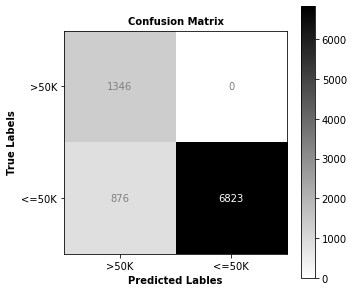

In [38]:
confusion_matrix = make_confusion_matrix(test_label, predicted_income)
plot_confusion_matrix(confusion_matrix, ['>50K', '<=50K'], title = 'Confusion Matrix')

In [40]:
# confusion_matrix = np.zeros((2,2), int)
# for i in range(len(predicted_income)):
#     if predicted_income[i] == '>50K' and test_label[i] == '>50K': confusion_matrix[0, 0] += 1
#     elif predicted_income[i] == '>50K' and test_label[i] =='<=50K': confusion_matrix[0, 1] += 1
#     elif predicted_income[i] == '<=50K' and test_label[i] == '>50K': confusion_matrix[1, 0] += 1
#     elif predicted_income[i] == '<=50K' and test_label[i] == '<=50K': confusion_matrix[1, 1] += 1